In [5]:
#We import all the libraries necessary for the analysis

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data = pd.read_csv("Tidy file")


In [9]:
#We now create a data frame that contains all the X variables and one for each response variable

X =  data[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 
           'overall_height', 'glazing_area', 'glazing_area_distribution1', 
           'glazing_area_distribution2', 'glazing_area_distribution3', 'glazing_area_distribution4', 
           'glazing_area_distribution5', 'orientation2', 'orientation3', 'orientation4', 'orientation5']]

heating_load = data['heating_load']
cooling_load = data['cooling_load']

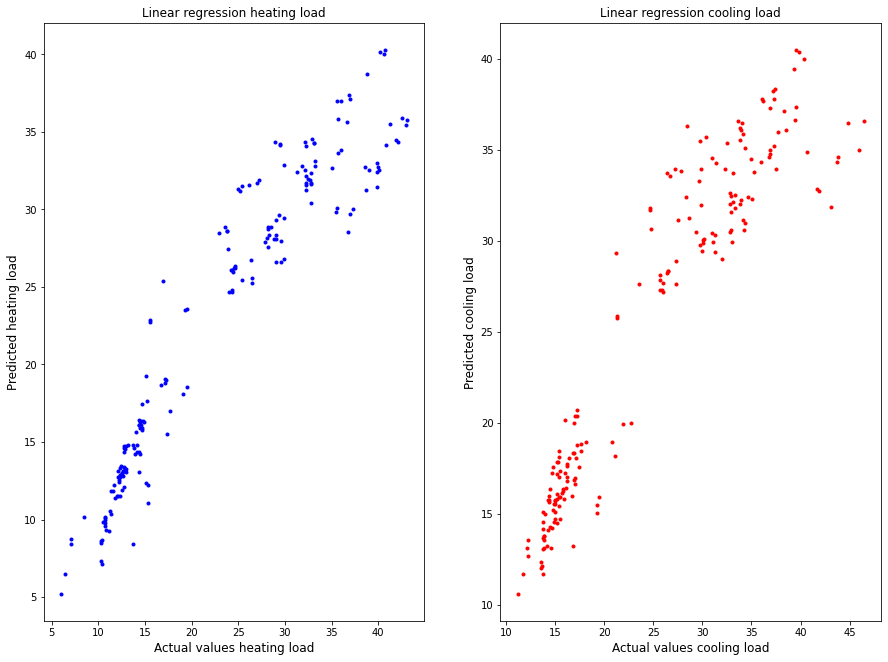

In [11]:
#We divide the data into training and testing samples

X_train, X_test, heating_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

#We fit the training data with the linear regression model, then predict the y values using the 
#x testing data and finally calculate the out of sample (or testing) MSE

reg1 = linear_model.LinearRegression()
reg1.fit(X_train, heating_load_train)
y_pred1_reg = reg1.predict(X_test)
mse_1_reg = np.mean((heating_load_test - y_pred1_reg)**2)

figure = plt.figure(figsize=(15, 11))

#subplot for r1 regression
ax = plt.subplot(1,2,1)
plt.title('Linear regression heating load')
plt.xlabel('Actual values heating load', size=12)
plt.ylabel('Predicted heating load', size=12)
plt.plot(heating_load_test,y_pred1_reg , '.b')


#Now we will do it to predict the cooling_load response variable

X_train2, X_test2, cooling_load_train2, cooling_load_test2 = train_test_split(X, cooling_load, random_state=0)

reg2 = linear_model.LinearRegression()
reg2.fit(X_train2, cooling_load_train2)
y_pred2_reg = reg2.predict(X_test2)

mse_2_reg = np.mean((cooling_load_test2 - y_pred2_reg)**2)


#subplot for r2 regression
ax = plt.subplot(1,2,2)
plt.title('Linear regression cooling load')
plt.xlabel('Actual values cooling load', size=12)
plt.ylabel('Predicted cooling load', size=12)
plt.plot(cooling_load_test2,y_pred2_reg , '.b', color = 'red')


In [13]:
print(reg1.coef_)

[-5.66640908e+01 -1.12137428e+11  1.12137428e+11  2.24274857e+11
  3.94608772e+00  1.91759662e+01  1.55631079e+00  1.30673130e+00
  1.17621497e+00 -2.50440116e+08  2.50440117e+08 -2.49681921e+08
 -2.49681921e+08 -2.49681921e+08 -2.49681922e+08]


40.24883971971356
32.65329311455412


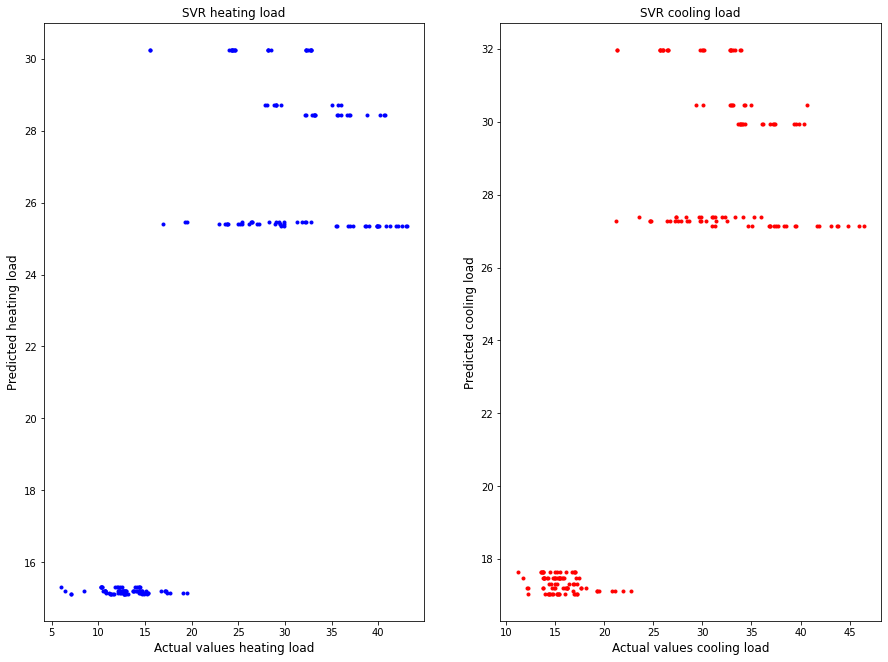

In [15]:
#We will now try other other regression models, to see which one has the best fit. We follow the same procedure as above
from sklearn.svm import SVR
figure2 = plt.figure(figsize=(15, 11))

X_train, X_test, heating_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

SVR1 = SVR()
SVR1.fit(X_train, heating_load_train) 
y_pred1_svm = SVR1.predict(X_test)

mse_1_svr = np.mean((heating_load_test - y_pred1_svm)**2)

print(mse_1_svr)

#subplot for r1 regression
ax = plt.subplot(1,2,1)
plt.title('SVR heating load')
plt.xlabel('Actual values heating load', size=12)
plt.ylabel('Predicted heating load', size=12)
plt.plot(heating_load_test, y_pred1_svm  , '.b')


X_train2, X_test2, cooling_load_train2, cooling_load_test2 = train_test_split(X, cooling_load, random_state=0)

SVR2 = SVR()
SVR2.fit(X_train2, cooling_load_train2) 
y_pred2_svm = SVR2.predict(X_test2)


mse_2_svr = np.mean((cooling_load_test2 - y_pred2_svm)**2)

print(mse_2_svr)

#subplot for r2 regression
ax = plt.subplot(1,2,2)
plt.title('SVR cooling load')
plt.xlabel('Actual values cooling load', size=12)
plt.ylabel('Predicted cooling load', size=12)
plt.plot(cooling_load_test2,y_pred2_svm , '.b', color = 'red')


0.37392059374999786
4.306014707395851


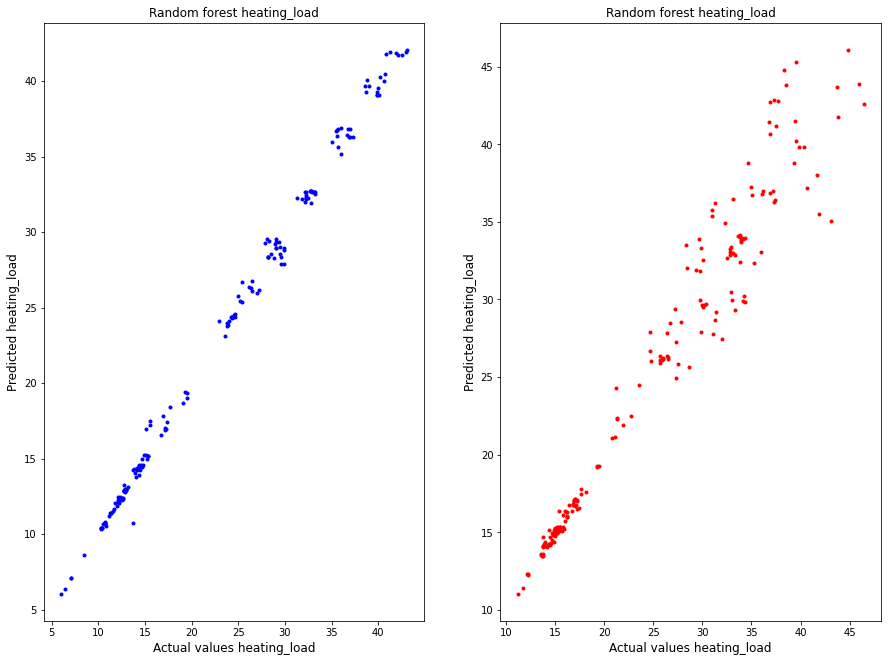

In [17]:

from sklearn.ensemble import RandomForestRegressor
figure3 = plt.figure(figsize=(15, 11))

X_train, X_test, cooling_load_train, heating_load_test = train_test_split(X, heating_load, random_state=0)

randomforest = RandomForestRegressor()
randomforest.fit(X_train, heating_load_train)
y_pred1_randomf = randomforest.predict(X_test)

mse_1_randomf = np.mean((heating_load_test - y_pred1_randomf)**2)

print(mse_1_randomf)

ax = plt.subplot(1,2,1)
plt.title('Random forest heating_load')
plt.xlabel('Actual values heating_load', size=12)
plt.ylabel('Predicted heating_load', size=12)
plt.plot(heating_load_test, y_pred1_randomf , '.b')

#cooling_load

X_train2, X_test2, cooling_load_train2, cooling_load_test2 = train_test_split(X, cooling_load, random_state=0)

randomforest = RandomForestRegressor()
randomforest.fit(X_train2, cooling_load_train2)
y_pred2_randomf = randomforest.predict(X_test2)

mse_2_randomf = np.mean((cooling_load_test2- y_pred2_randomf)**2)

print(mse_2_randomf)

ax = plt.subplot(1,2,2)
plt.title('Random forest heating_load')
plt.xlabel('Actual values heating_load', size=12)
plt.ylabel('Predicted heating_load', size=12)
plt.plot(cooling_load_test2, y_pred2_randomf , '.b', color = 'red')

In [18]:

info= {'Response variable':  ['heating load', 'heating load', 'heating load', 'cooling load', 'cooling load', 'cooling'],
        'Regression model': ['linear regression', 'SVR', 'random forest', 'linear regression', 'SVR', 'random forest'], 
        'Testing MSE':  [mse_1_reg, mse_1_svr, mse_1_randomf, mse_2_reg, mse_1_svr, mse_1_randomf]}

df = pd.DataFrame(info)

print(df)


  Response variable   Regression model  Testing MSE
0      heating load  linear regression     9.982370
1      heating load                SVR    40.248840
2      heating load      random forest     0.373921
3      cooling load  linear regression    10.087057
4      cooling load                SVR    40.248840
5           cooling      random forest     0.373921
